# ANN Classification Project

# The Data




# Breast cancer wisconsin (diagnostic) dataset
# Data Set Characteristics:

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry 
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 3 is Mean Radius, field
    13 is Radius SE, field 23 is Worst Radius.

    - class:
            - WDBC-Malignant
            - WDBC-Benign

:Summary Statistics:

===================================== ====== ======
                                       Min    Max
===================================== ====== ======
radius (mean):                        6.981  28.11
texture (mean):                       9.71   39.28
perimeter (mean):                     43.79  188.5
area (mean):                          143.5  2501.0
smoothness (mean):                    0.053  0.163
compactness (mean):                   0.019  0.345
concavity (mean):                     0.0    0.427
concave points (mean):                0.0    0.201
symmetry (mean):                      0.106  0.304
fractal dimension (mean):             0.05   0.097
radius (standard error):              0.112  2.873
texture (standard error):             0.36   4.885
perimeter (standard error):           0.757  21.98
area (standard error):                6.802  542.2
smoothness (standard error):          0.002  0.031
compactness (standard error):         0.002  0.135
concavity (standard error):           0.0    0.396
concave points (standard error):      0.0    0.053
symmetry (standard error):            0.008  0.079
fractal dimension (standard error):   0.001  0.03
radius (worst):                       7.93   36.04
texture (worst):                      12.02  49.54
perimeter (worst):                    50.41  251.2
area (worst):                         185.2  4254.0
smoothness (worst):                   0.071  0.223
compactness (worst):                  0.027  1.058
concavity (worst):                    0.0    1.252
concave points (worst):               0.0    0.291
symmetry (worst):                     0.156  0.664
fractal dimension (worst):            0.055  0.208
===================================== ====== ======

:Missing Attribute Values: None

:Class Distribution: 212 - Malignant, 357 - Benign

:Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

:Donor: Nick Street

:Date: November, 1995
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('cancer_classification.csv')
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


# EDA(Exploratory data Analysis)

<Axes: xlabel='benign_0__mal_1', ylabel='count'>

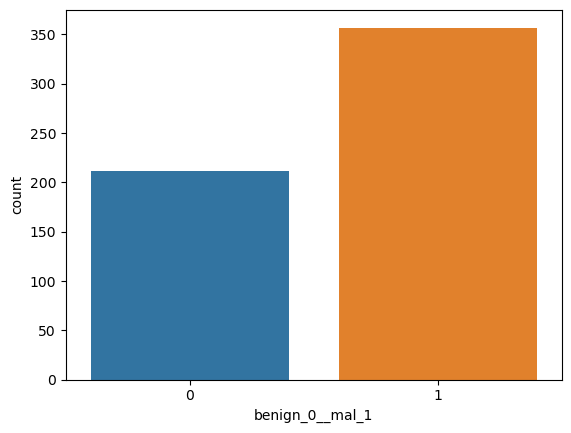

In [6]:
sns.countplot(x='benign_0__mal_1',data=df)

<Axes: >

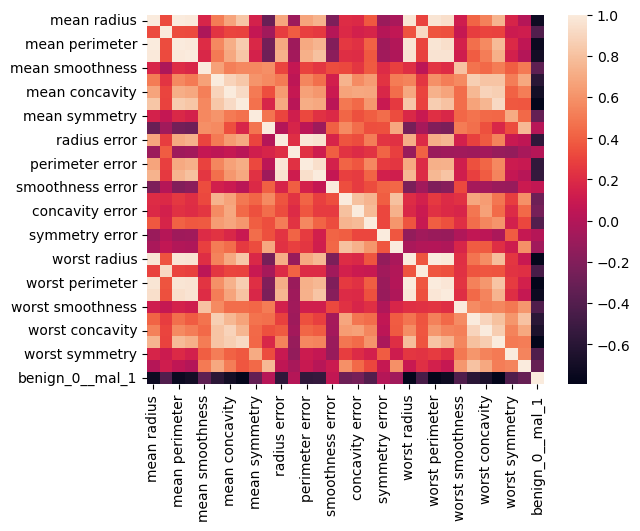

In [7]:
sns.heatmap(df.corr())

In [8]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

<Axes: >

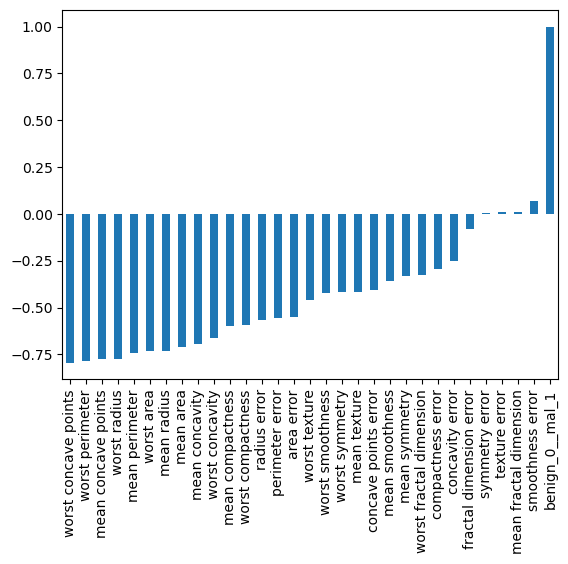

In [9]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

<Axes: >

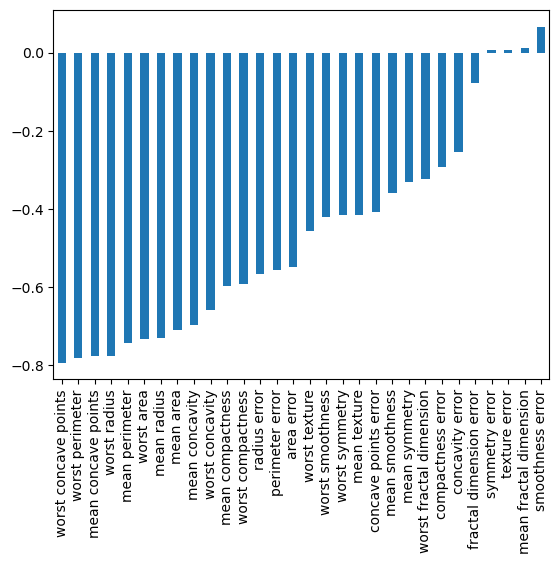

In [10]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

# Train test split


In [11]:
X=df.drop('benign_0__mal_1', axis=1).values
y=df['benign_0__mal_1'].values

In [12]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [13]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [14]:
X.shape

(569, 30)

In [15]:
y.shape

(569,)

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.25,random_state=101)

In [17]:
X_train

array([[1.317e+01, 1.822e+01, 8.428e+01, ..., 1.045e-01, 2.235e-01,
        6.925e-02],
       [1.262e+01, 1.715e+01, 8.062e+01, ..., 9.851e-02, 3.270e-01,
        7.330e-02],
       [1.480e+01, 1.766e+01, 9.588e+01, ..., 8.308e-02, 3.600e-01,
        7.285e-02],
       ...,
       [1.607e+01, 1.965e+01, 1.041e+02, ..., 1.520e-01, 2.650e-01,
        6.387e-02],
       [1.877e+01, 2.143e+01, 1.229e+02, ..., 2.048e-01, 3.679e-01,
        9.870e-02],
       [1.371e+01, 1.868e+01, 8.873e+01, ..., 1.284e-01, 2.849e-01,
        9.031e-02]])

In [18]:
X_train.shape

(426, 30)

In [19]:
y_train.shape

(426,)

In [20]:
y_train

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,

In [21]:
X_test.shape

(143, 30)

In [22]:
y_test.shape

(143,)

# Feature Scaling


In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler=MinMaxScaler()

In [25]:
scaler.fit(X_train)

MinMaxScaler()

In [26]:
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

# Creating the model
# For a binary classification problem
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

In [28]:
X_train.shape 

(426, 30)

In [29]:
model=Sequential()
# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw
model.add(Dense(units=30,activation ='relu'))
model.add(Dense(units=15, activation ='relu'))
model.add(Dense(units=1, activation='sigmoid'))
#for binary classifiaction problem
model.compile(loss='binary_crossentropy', optimizer='adam')

# TARINING THE MODEL

In [30]:
# https://stats.stackexchange.com/questions/164876/tradeoff-batch-size-vs-number-of-iterations-to-train-a-neural-network
# https://datascience.stackexchange.com/questions/18414/are-there-any-rules-for-choosing-the-size-of-a-mini-batch

model.fit(x=X_train,
         y=y_train,
         epochs=600,
         validation_data=(X_test, y_test), verbose=1)

Epoch 1/600

14/14 [==============================] - 1s 22ms/step - loss: 0.6856 - val_loss: 0.6704
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6548 - val_loss: 0.6401
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6192 - val_loss: 0.6061
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5806 - val_loss: 0.5651
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5390 - val_loss: 0.5178
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4919 - val_loss: 0.4695
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4445 - val_loss: 0.4202
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3981 - val_loss: 0.3725
Epoch 9/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3557 - val_loss: 0.3314
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3260 - val_loss: 0.2991
Epoch 1

Epoch 81/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0555 - val_loss: 0.1146
Epoch 82/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0576 - val_loss: 0.1228
Epoch 83/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0543 - val_loss: 0.1162
Epoch 84/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0535 - val_loss: 0.1167
Epoch 85/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0536 - val_loss: 0.1194
Epoch 86/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0554 - val_loss: 0.1133
Epoch 87/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0551 - val_loss: 0.1179
Epoch 88/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0543 - val_loss: 0.1238
Epoch 89/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0530 - val_loss: 0.1239
Epoch 90/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0521 - val_loss: 0.1162


14/14 [==============================] - 0s 5ms/step - loss: 0.0446 - val_loss: 0.1312
Epoch 163/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0438 - val_loss: 0.1285
Epoch 164/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0443 - val_loss: 0.1206
Epoch 165/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0473 - val_loss: 0.1288
Epoch 166/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0465 - val_loss: 0.1301
Epoch 167/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0438 - val_loss: 0.1253
Epoch 168/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0435 - val_loss: 0.1279
Epoch 169/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0434 - val_loss: 0.1341
Epoch 170/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0448 - val_loss: 0.1255
Epoch 171/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0426 - val_loss: 0.1332
Epoc

14/14 [==============================] - 0s 5ms/step - loss: 0.0367 - val_loss: 0.1366
Epoch 244/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0373 - val_loss: 0.1453
Epoch 245/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0367 - val_loss: 0.1431
Epoch 246/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0427 - val_loss: 0.1661
Epoch 247/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0416 - val_loss: 0.1355
Epoch 248/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0436 - val_loss: 0.1539
Epoch 249/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0363 - val_loss: 0.1386
Epoch 250/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0357 - val_loss: 0.1569
Epoch 251/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0394 - val_loss: 0.1353
Epoch 252/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0394 - val_loss: 0.1586
Epoc

14/14 [==============================] - 0s 5ms/step - loss: 0.0358 - val_loss: 0.1726
Epoch 325/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0311 - val_loss: 0.1556
Epoch 326/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0401 - val_loss: 0.1884
Epoch 327/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0367 - val_loss: 0.1608
Epoch 328/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0314 - val_loss: 0.1538
Epoch 329/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0302 - val_loss: 0.1678
Epoch 330/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0323 - val_loss: 0.1543
Epoch 331/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0345 - val_loss: 0.1709
Epoch 332/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0314 - val_loss: 0.1617
Epoch 333/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0301 - val_loss: 0.1676
Epoc

14/14 [==============================] - 0s 5ms/step - loss: 0.0271 - val_loss: 0.1665
Epoch 406/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0269 - val_loss: 0.1810
Epoch 407/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0276 - val_loss: 0.1918
Epoch 408/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0271 - val_loss: 0.1729
Epoch 409/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0285 - val_loss: 0.1742
Epoch 410/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0305 - val_loss: 0.1555
Epoch 411/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0298 - val_loss: 0.1777
Epoch 412/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0260 - val_loss: 0.1671
Epoch 413/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0263 - val_loss: 0.1844
Epoch 414/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0263 - val_loss: 0.1653
Epoc

14/14 [==============================] - 0s 5ms/step - loss: 0.0247 - val_loss: 0.2199
Epoch 487/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0288 - val_loss: 0.1772
Epoch 488/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0241 - val_loss: 0.1997
Epoch 489/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0310 - val_loss: 0.2454
Epoch 490/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0263 - val_loss: 0.1669
Epoch 491/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0247 - val_loss: 0.2244
Epoch 492/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0220 - val_loss: 0.1779
Epoch 493/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0218 - val_loss: 0.2117
Epoch 494/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0208 - val_loss: 0.1935
Epoch 495/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0209 - val_loss: 0.1865
Epoc

14/14 [==============================] - 0s 5ms/step - loss: 0.0191 - val_loss: 0.1806
Epoch 568/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0232 - val_loss: 0.2220
Epoch 569/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0190 - val_loss: 0.1945
Epoch 570/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0165 - val_loss: 0.2277
Epoch 571/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0196 - val_loss: 0.1766
Epoch 572/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0184 - val_loss: 0.2502
Epoch 573/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0191 - val_loss: 0.1860
Epoch 574/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0176 - val_loss: 0.2110
Epoch 575/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0162 - val_loss: 0.2105
Epoch 576/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0181 - val_loss: 0.2423
Epoc

In [31]:
model_loss=pd.DataFrame(model.history.history)

<Axes: >

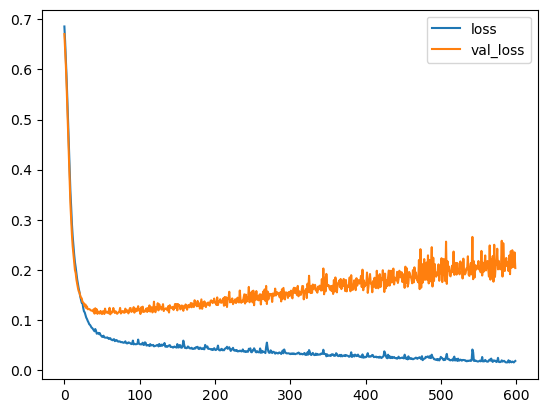

In [32]:
model_loss.plot()

# Example Two: Early Stopping
We obviously trained too much! Let's use early stopping to track the val_loss and stop training once it begins increasing too much!

In [33]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [34]:
from tensorflow.keras.callbacks import EarlyStopping

# Stop training when a monitored quantity has stopped improving.

Arguments:
    monitor: Quantity to be monitored.
    min_delta: Minimum change in the monitored quantity
        to qualify as an improvement, i.e. an absolute
        change of less than min_delta, will count as no
        improvement.
    patience: Number of epochs with no improvement
        after which training will be stopped.
    verbose: verbosity mode.
    mode: One of `{"auto", "min", "max"}`. In `min` mode,
        training will stop when the quantity
        monitored has stopped decreasing; in `max`
        mode it will stop when the quantity
        monitored has stopped increasing; in `auto`
        mode, the direction is automatically inferred
        from the name of the monitored quantity.

In [35]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)


In [36]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 1s 15ms/step - loss: 0.6899 - val_loss: 0.6727
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6631 - val_loss: 0.6493
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6346 - val_loss: 0.6182
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5983 - val_loss: 0.5801
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5555 - val_loss: 0.5355
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5091 - val_loss: 0.4857
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4606 - val_loss: 0.4365
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4125 - val_loss: 0.3911
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3705 - val_loss: 0.3478
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3322 - val_loss: 0.3102
Epoch 11

<Axes: >

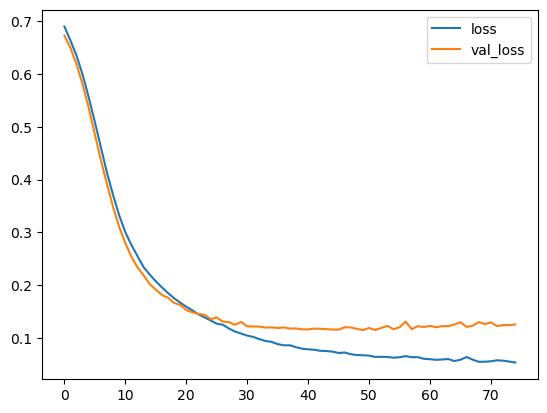

In [37]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

# Example Three: Adding in DropOut Layers


In [38]:

from tensorflow.keras.layers import Dropout

In [39]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [40]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 1s 15ms/step - loss: 0.7046 - val_loss: 0.6696
Epoch 2/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6695 - val_loss: 0.6473
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6478 - val_loss: 0.6188
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6386 - val_loss: 0.5806
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6023 - val_loss: 0.5548
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5799 - val_loss: 0.5288
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5510 - val_loss: 0.4918
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5288 - val_loss: 0.4654
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5071 - val_loss: 0.4361
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4946 - val_loss: 0.4119
Epoch 11

14/14 [==============================] - 0s 5ms/step - loss: 0.1037 - val_loss: 0.0943
Epoch 84/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1007 - val_loss: 0.1006
Epoch 85/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1133 - val_loss: 0.1017
Epoch 86/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1084 - val_loss: 0.1053
Epoch 87/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1139 - val_loss: 0.0901
Epoch 88/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1047 - val_loss: 0.0952
Epoch 89/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1254 - val_loss: 0.0895
Epoch 90/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1160 - val_loss: 0.0931
Epoch 91/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1177 - val_loss: 0.0949
Epoch 92/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0929 - val_loss: 0.0944
Epoch 93/600


# Model Evalution

In [41]:
predictions = model.predict(X_test)

5/5 [==============================] - 0s 2ms/step
